# Chap11 XGboost

## 1.概述

### 1.1 xgboost库与XGB的sklearn API

**使用xgboost库的流程**
1. xgboost中必须使用DMtarix()读取数据
2. 设置参数 param={}
3. 训练模型 bst = xgb.train(param)
4. 预测结果 bst.predict()

In [ ]:
!pip install -i https://pypi.tuna.tsinghua.edu.cn/simple --trusted-host pypi.tuna.tsinghua.edu.cn xgboost

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple


In [25]:
import xgboost as xbg

### 1.3 XGBoost的三大板块

整体来说可以有三个核心部分：集成算法本身，用于集成的弱评估器，以及应用中的其他过程

## 2.梯度提升树

`class xgboost.XGBRegressor (max_depth=3, learning_rate=0.1, n_estimators=100, silent=True,objective='reg:linear', booster='gbtree', n_jobs=1, nthread=None, gamma=0, min_child_weight=1, max_delta_step=0,subsample=1, colsample_bytree=1, colsample_bylevel=1, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,base_score=0.5, random_state=0, seed=None, missing=None, importance_type='gain', **kwargs)`

### 2.1 提升集成算法：重要参数n_estimators

集成算法通过在数据上构建多个弱评估器，汇总所有弱评估器的建模结果，以获取比单个模型更好的回归或分类表现。

- XGBoost背后也是CART树，这意味着XGBoost中所有的树都是二叉的。

**XGB vs GBDT 核心区别1：求解预测值y_hat的方式不同**

- GBDT中预测值是由所有弱分类器上的预测结果的加权求和，其中每个样本上的预测结果就是样本所在的叶子节点的均值。
- XGBT中的预测值是所有弱分类器上的叶子权重直接求和得到，计算叶子权重是一个复杂的过程。


参数含义 |xgb.train()| xgb.XGBRegressor()
|---|---|---|
集成中弱评估器的数量 | num_round，默认10 | n_estimators，默认100
训练中是否打印每次训练的结果 | slient，默认False | slient，默认True


**sklearn中调用方法**
- XGBR(n_estimators=100).fit(Xtrain,Ytrain) 实例化 训练
- .score 调用分数R2
- .predict 预测结果
- mean_squared_error(真实值,预测值)
- .feature_importances_  树模型的优势，能够查看模型的重要性分数
- sklearn.metrics.get_scorer_names() 获取sklearn中所有评分指标的名字

**1. 导入需要的库，模块以及数据**

In [26]:
from xgboost import XGBRegressor as XGBR
from sklearn.ensemble import RandomForestRegressor as RFR
from sklearn.linear_model import LinearRegression as LinearR
from sklearn.datasets import load_boston
from sklearn.model_selection import KFold, cross_val_score as CVS, train_test_split as TTS
from sklearn.metrics import mean_squared_error as MSE
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from time import time
import datetime


data = load_boston()
#波士顿数据集非常简单，但它所涉及到的问题却很多
X = data.data
y = data.target


c:\Users\HP\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing datase

In [27]:
X.shape

(506, 13)

In [28]:
y.shape

(506,)

In [29]:
y = data.target


**2. 建模，查看其他接口和属性**


In [30]:
Xtrain,Xtest,Ytrain,Ytest = TTS(X,y,test_size=0.3,random_state=420)


In [31]:
reg = XGBR(n_estimators=100).fit(Xtrain,Ytrain)

In [32]:
reg.predict(Xtest)

array([ 6.6689262, 22.34918  , 31.052807 , 13.911595 ,  9.467966 ,
       22.658588 , 14.514282 , 15.092699 , 15.293644 , 12.680115 ,
       24.140797 , 35.890083 , 21.573483 , 27.07066  , 19.052658 ,
        9.89033  , 23.386076 , 23.588493 , 23.311466 , 22.401644 ,
       18.98444  , 15.766946 , 25.8352   , 20.193802 , 19.982517 ,
       15.611423 , 22.883228 , 29.838228 , 22.815304 , 16.779037 ,
       37.13194  , 20.133305 , 19.67352  , 23.525528 , 22.845137 ,
       23.87397  , 15.17887  , 23.45934  , 16.685331 , 31.761686 ,
       18.525843 , 22.441063 , 38.48728  , 17.93719  , 15.10122  ,
       28.980541 , 46.363487 , 12.842797 ,  9.618281 , 35.40579  ,
       25.657566 , 20.605602 , 20.800055 , 49.228447 , 31.355848 ,
       29.382515 , 18.911947 , 21.049877 , 16.165182 , 18.098577 ,
       14.659002 , 21.720213 , 19.413454 , 28.932102 , 30.573524 ,
       19.228426 , 20.531511 , 15.666289 , 23.52929  , 19.30554  ,
       28.384985 , 42.83562  , 29.429724 , 23.306015 , 19.7412

In [33]:
reg.score(Xtest,Ytest)  # 返回的是R2

0.9050988968414799

In [34]:
y.mean()

22.532806324110677

In [35]:
MSE(Ytest,reg.predict(Xtest))

# 误差占到整体30%以上  拟合较差

8.830916343629323

In [36]:
reg.feature_importances_  # 树模型的优势，能够查看模型的重要性分数，

array([0.01902167, 0.0042109 , 0.01478316, 0.00553537, 0.02222196,
       0.37914088, 0.01679686, 0.0469872 , 0.04073574, 0.05491759,
       0.06684221, 0.00869464, 0.3201119 ], dtype=float32)

**3. 交叉验证，与线性回归&随机森林回归进行对比**

In [37]:
reg = XGBR(n_estimators=100)  # 交叉验证中导入没有经过训练的模型


In [38]:
CVS(reg,Xtrain,Ytrain,cv=5)   # 此处返回的模型评估指标就是R2

# 交叉验证中返回分数与模型调用score接口返回分数相同
# 分类算法中分数就是 准确率

array([0.83123948, 0.77538516, 0.82292472, 0.81418649, 0.75379556])

**严谨的交叉验证和不严谨的交叉验证**

- 放入全数据 ---> 不严谨
- 只放入训练集数据

In [39]:
CVS(reg,Xtrain,Ytrain,cv=5,scoring='neg_mean_squared_error').mean()

-16.215644229762717

In [40]:
import sklearn
sklearn.metrics.get_scorer_names()

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'matthews_corrcoef',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_absolute_percentage_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'rand_score',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'roc_auc_ovo',
 'roc_auc_ovo_weighted',
 'roc_auc_

In [41]:
#来查看一下sklearn中所有的模型评估指标
import sklearn
sorted(sklearn.metrics.SCORERS.keys())

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'matthews_corrcoef',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_absolute_percentage_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'rand_score',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'roc_auc_ovo',
 'roc_auc_ovo_weighted',
 'roc_auc_

In [42]:
#————————————————————————————使用随机森林进行对比————————————————————————————
rfr = RFR(n_estimators=100)
CVS(rfr,Xtrain,Ytrain,cv=5).mean()

# XGBR R2 为0.9 效果很好

0.8032542933386997

In [43]:
CVS(rfr,Xtrain,Ytrain,cv=5,scoring='neg_mean_squared_error').mean()

-16.9298084044668

In [44]:
#————————————————————————————使用线性回归进行对比————————————————————————————
lr = LinearR()
CVS(lr,Xtrain,Ytrain,cv=5).mean()


0.6835070597278092

In [45]:
CVS(lr,Xtrain,Ytrain,cv=5,scoring='neg_mean_squared_error').mean()

-25.34950749364836

In [46]:
#————————————————————————————开启参数slient————————————————————————————
reg = XGBR(n_esimators=10,silent=False)
CVS(reg,Xtrain,Ytrain,cv=5,scoring='neg_mean_squared_error').mean()

[10:33:40] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "n_esimators", "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[10:33:40] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "n_esimators", "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[10:33:40] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "n_esimators", "silent" 

-16.215644229762717

**4. 定义绘制以训练样本数为横坐标的学习曲线的函数**

In [47]:
def plot_learning_curve(estimator,title, X, y,
                        ax=None, #选择子图
                        ylim=None, #设置纵坐标的取值范围
                        cv=None, #交叉验证
                        n_jobs=None #设定索要使用的线程
                        ):

    from sklearn.model_selection import learning_curve
    import matplotlib.pyplot as plt
    import numpy as np

    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y
                                                            ,shuffle=True
                                                            ,cv=cv
                                                            # ,random_state=420
                                                            ,n_jobs=n_jobs)
    if ax == None:
        ax = plt.gca()
    else:
        ax = plt.figure()
    ax.set_title(title)
    if ylim is not None:
        ax.set_ylim(*ylim)

    ax.set_xlabel("Training examples")
    ax.set_ylabel("Score")
    
    ax.grid() #绘制网格，不是必须
    ax.plot(train_sizes, np.mean(train_scores, axis=1), 'o-', color="r",label="Training score")
    ax.plot(train_sizes, np.mean(test_scores, axis=1), 'o-', color="g",label="Test score")
    ax.legend(loc="best")
    return ax

**5. 使用学习曲线观察XGB在波士顿数据集上的潜力**

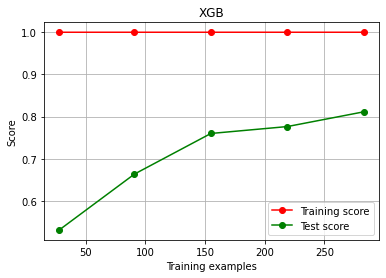

In [48]:
cv = KFold(n_splits=5,shuffle=True,random_state=420)
plot_learning_curve(XGBR(n_estimators=100,random_state=420),"XGB",Xtrain,Ytrain,ax=None,cv=cv)
plt.show()

# 多次运行以后 整体的趋势相同 但是图像不一样 （每次样本的选择都是随机）
# 模型处于过拟合的装填

**6. 使用参数学习曲线观察n_estimators对模型的影响**

85 0.8131196607397149


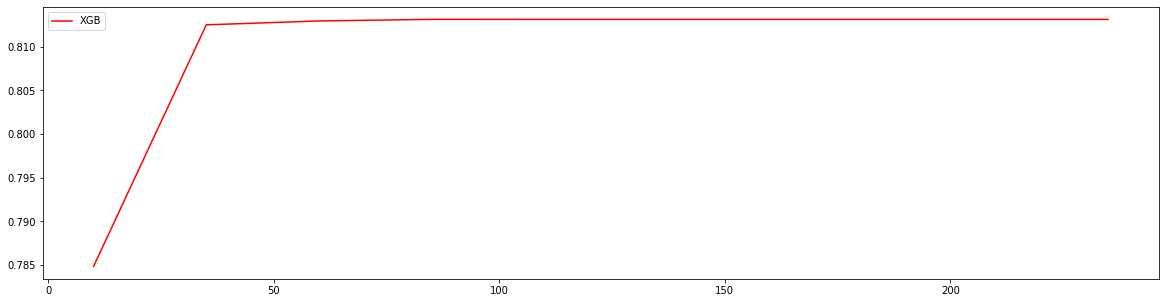

In [49]:
axisx = range(10,250,25)
rs = []
for i in axisx:
    reg = XGBR(n_estimators=i,random_state=420)
    rs.append(CVS(reg,Xtrain,Ytrain,cv=cv).mean())

print(axisx[rs.index(max(rs))],max(rs))
plt.figure(figsize=(20,5))
plt.plot(axisx,rs,c="red",label="XGB")
plt.legend()
plt.show()
#选出来的n_estimators非常不寻常，我们是否要选择准确率最高的n_estimators值呢？



**7. 进化的学习曲线：方差与泛化误差**

衡量模型在未知数据上的准确率的指标，叫做泛化误差（Genelization error）,泛化误差由方差、偏差和噪声组成。其中偏差就是训练集上的拟合程度决定，方差是模型的稳定性决定，噪音是不可控的。而泛化误差越小，模型就越理想。

在过去我们往往直接取学习曲线获得的分数的最高点，即考虑偏差最小的点，是因为模型极度不稳定，方差很大的情况其实比较少见。但现在我们的数据量非常少，模型会相对不稳定，因此我们应当将方差也纳入考虑的范围。在绘制学习曲线时，我们不仅要考虑偏差的大小，还要考虑方差的大小，更要考虑泛化误差中我们可控的部分。

250 0.8131149348490775 0.008852347181932483
250 0.8131149348490775 0.008852347181932483
250 0.8131149348490775 0.008852347181932483 0.043778374758397035


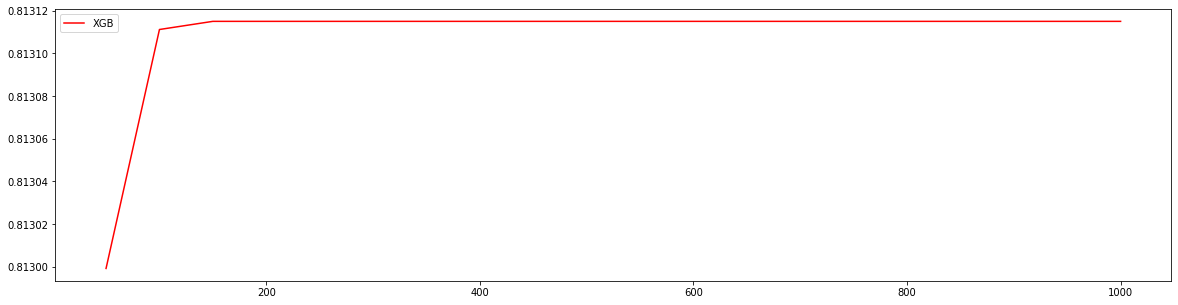

In [50]:
axisx = range(50,1050,50)
rs = []
var = []
ge = []

for i in axisx:
    reg = XGBR(n_estimators=i,random_state=420)
    cvresult = CVS(reg,Xtrain,Ytrain,cv=cv)
    #记录1-偏差
    rs.append(cvresult.mean())
    #记录方差
    var.append(cvresult.var())
    #计算泛化误差的可控部分
    ge.append((1 - cvresult.mean())**2+cvresult.var())
    
#打印R2最高所对应的参数取值，并打印这个参数下的方差
print(axisx[rs.index(max(rs))],max(rs),var[rs.index(max(rs))])
#打印方差最低时对应的参数取值，并打印这个参数下的R2
print(axisx[var.index(min(var))],rs[var.index(min(var))],min(var))
#打印泛化误差可控部分的参数取值，并打印这个参数下的R2，方差以及泛化误差的可控部分
print(axisx[ge.index(min(ge))],rs[ge.index(min(ge))],var[ge.index(min(ge))],min(ge))

plt.figure(figsize=(20,5))
plt.plot(axisx,rs,c="red",label="XGB")
plt.legend()
plt.show()


**8. 细化学习曲线，找出最佳n_estimators**


130 0.8131152499566443 0.008852524740114883
240 0.8131149348490775 0.008852347181932483
240 0.8131149348490775 0.008852347181932483 0.043778374758397035


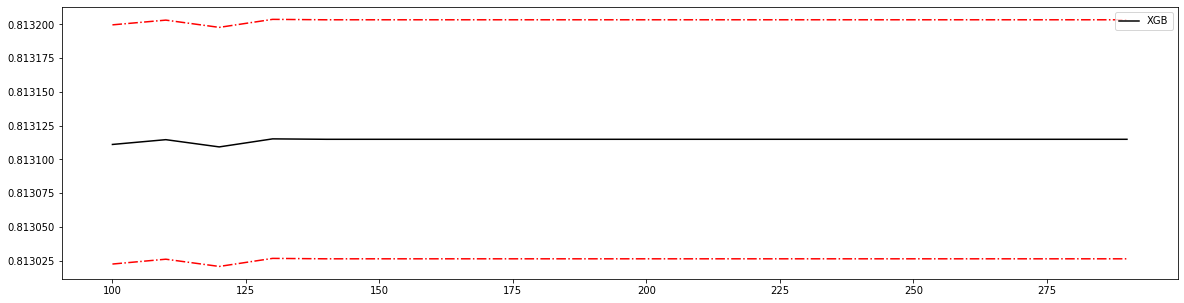

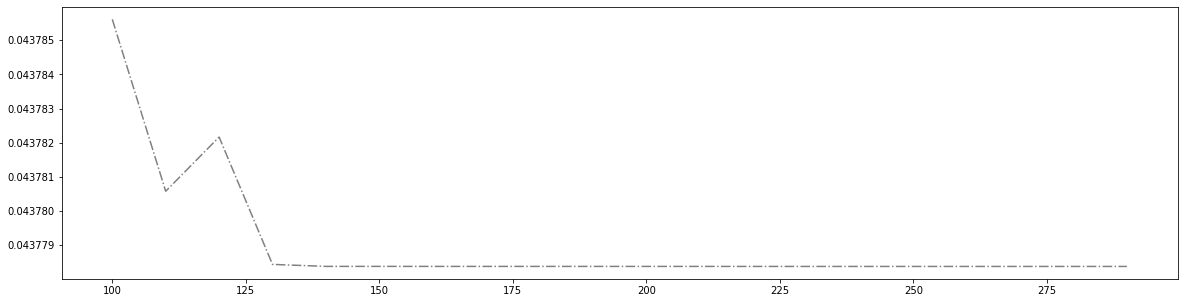

In [51]:
axisx = range(100,300,10)
rs = []
var = []
ge = []
for i in axisx:
    reg = XGBR(n_estimators=i,random_state=420)
    cvresult = CVS(reg,Xtrain,Ytrain,cv=cv)
    rs.append(cvresult.mean())
    var.append(cvresult.var())
    ge.append((1 - cvresult.mean())**2+cvresult.var())

print(axisx[rs.index(max(rs))],max(rs),var[rs.index(max(rs))])
print(axisx[var.index(min(var))],rs[var.index(min(var))],min(var))
print(axisx[ge.index(min(ge))],rs[ge.index(min(ge))],var[ge.index(min(ge))],min(ge))
rs = np.array(rs)
var = np.array(var)*0.01
plt.figure(figsize=(20,5))
plt.plot(axisx,rs,c="black",label="XGB")

#添加方差线
plt.plot(axisx,rs+var,c="red",linestyle='-.')
plt.plot(axisx,rs-var,c="red",linestyle='-.')
plt.legend()
plt.show()

#看看泛化误差的可控部分如何？
plt.figure(figsize=(20,5))
plt.plot(axisx,ge,c="gray",linestyle='-.')
plt.show()


**9. 检测模型效果**

In [52]:
#验证模型效果是否提高了？
time0 = time()
print(XGBR(n_estimators=100,random_state=420).fit(Xtrain,Ytrain).score(Xtest,Ytest))
print(time()-time0)


0.9050988968414799
0.0827789306640625


In [53]:
time0 = time()
print(XGBR(n_estimators=660,random_state=420).fit(Xtrain,Ytrain).score(Xtest,Ytest))
print(time()-time0)


0.9050526026617368
0.229386568069458


In [54]:
time0 = time()
print(XGBR(n_estimators=180,random_state=420).fit(Xtrain,Ytrain).score(Xtest,Ytest))
print(time()-time0)


0.9050526026617368
0.1176903247833252


**结论**

1. XGB中的树的数量决定了模型的学习能力，树的数量越多，模型的学习能力越强
2. XGB中树的数量很少的时候，对模型的影响较大，当树的数量已经很多的时候，对模型的影响比较小，只能有微弱的变化
3. 树的数量提升对模型的影响有极限

- n_estimators，300以下为佳。


### 2.2 有放回随机抽样：重要参数subsample

- 每构建一个评估器，都让模型更加集中于数据集中容易被判错的那些样本
  - 第二次抽样中，加大了被第一棵树判断错误的样本的权重。
- 只要弱分类器足够强大，随着模型整体不断在被判错的样本上发力，这些样本会渐渐被判断正确。
- 后面的树，都在不断修正前面分类错误的结果

参数`subsample`来控制我们的随机抽样。在xgb和sklearn中，这个参数都默认为1且不能取到0，这说明我们无法控制模型是否进行随机有放回抽样，只能控制抽样抽出来的样本量大概是多少，范围(0,1]

采样会减少样本数量，而从学习曲线来看样本数量越少模型的过拟合会越严重，因为对模型来说，数据量越少模型学习越容易，学到的规则也会越具体**越不适用于测试样本**。

0.7894736842105263 0.8311535529353655


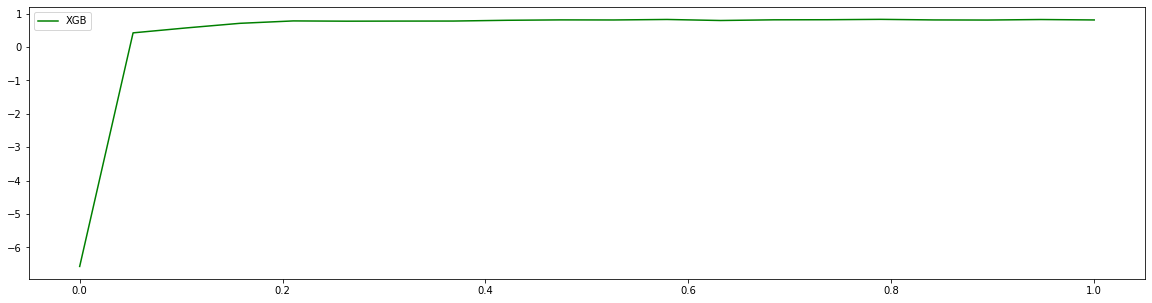

In [55]:
axisx = np.linspace(0,1,20)
rs = []
for i in axisx:
    reg = XGBR(n_estimators=180,subsample=i,random_state=420)
    rs.append(CVS(reg,Xtrain,Ytrain,cv=cv).mean())
    
print(axisx[rs.index(max(rs))],max(rs))
plt.figure(figsize=(20,5))
plt.plot(axisx,rs,c="green",label="XGB")
plt.legend()
plt.show()

0.8958333333333333 0.834342266600667 0.0046952656769332435
0.96875 0.8252453537450062 0.0019206013249795102
0.7916666666666666 0.8327030296114508 0.002602708746673087 0.03059098504786019


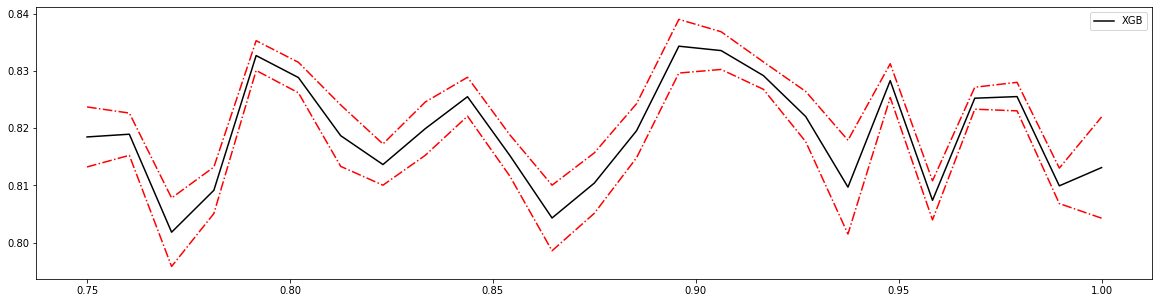

In [56]:
#细化学习曲线
axisx = np.linspace(0.75,1,25)
rs = []
var = []
ge = []

for i in axisx:
    reg = XGBR(n_estimators=180,subsample=i,random_state=420)  # 调整每次抽样的比例
    cvresult = CVS(reg,Xtrain,Ytrain,cv=cv)
    rs.append(cvresult.mean())
    var.append(cvresult.var())
    ge.append((1 - cvresult.mean())**2+cvresult.var())
    
print(axisx[rs.index(max(rs))],max(rs),var[rs.index(max(rs))])
print(axisx[var.index(min(var))],rs[var.index(min(var))],min(var))
print(axisx[ge.index(min(ge))],rs[ge.index(min(ge))],var[ge.index(min(ge))],min(ge))

rs = np.array(rs)
var = np.array(var)
plt.figure(figsize=(20,5))
plt.plot(axisx,rs,c="black",label="XGB")
plt.plot(axisx,rs+var,c="red",linestyle='-.')
plt.plot(axisx,rs-var,c="red",linestyle='-.')
plt.legend()
plt.show()

In [57]:
#看看泛化误差的情况如何
reg = XGBR(n_estimators=180
,subsample=0.7708333333333334
,random_state=420).fit(Xtrain,Ytrain)
reg.score(Xtest,Ytest)
MSE(Ytest,reg.predict(Xtest))

9.103002897056138

数据集过少，降低抽样的比例反而让数据的效果更低，不如就让它保持默认

### 2.3 迭代决策树：重要参数eta

保证每次新添加的树一定得是对这个新数据集预测效果最优的那一棵树

- 参数`learning_rate`学习速率
  - 集成中的学习率，又称为步长以控制迭代速率，常用于防止过拟合
  - xgb.train(),xgboost库中为eta，默认0.3 取值范围[0,1]
  - xgb.XGBRegressor()，sklearn中为learning_rate，默认0.1 取值范围[0,1]

In [58]:
#首先我们先来定义一个评分函数，这个评分函数能够帮助我们直接打印Xtrain上的交叉验证结果

def regassess(reg,Xtrain,Ytrain,cv,scoring=['r2'],show=True):
    """
    评分默认为R2
    """
    score = []
    for i in range(len(scoring)):
        if show:
            print("{}:{:.2f}".format(scoring[i]
                ,CVS(reg,Xtrain,Ytrain,cv=cv,scoring=scoring[i]).mean()))
            # 打印模型评估指标的名字 以及交叉验证的平均分
        score.append(CVS(reg,Xtrain,Ytrain,cv=cv,scoring=scoring[i]).mean())
    return score


In [59]:
# 运行一下函数来看看效果
regassess(reg,Xtrain,Ytrain,cv,scoring = ["r2","neg_mean_squared_error"])

r2:0.80
neg_mean_squared_error:-14.33


[0.8018110846099077, -14.333701060996855]

In [60]:
# 关闭打印功能
regassess(reg,Xtrain,Ytrain,cv,scoring = ["r2","neg_mean_squared_error"],show=False)

# 不进行打印 返回R2 和均方误差

[0.8018110846099077, -14.333701060996855]

In [61]:
#————————————————————————————#观察一下eta如何影响我们的模型————————————————————————————

from time import time
import datetime

for i in [0,0.2,0.5,1]:
    time0=time()
    reg = XGBR(n_estimators=180,random_state=420,learning_rate=i)
    print("learning_rate = {}".format(i))
    regassess(reg,Xtrain,Ytrain,cv,scoring = ["r2","neg_mean_squared_error"])
    print(datetime.datetime.fromtimestamp(time()-time0).strftime("%M:%S:%f"))
    print("\t")

learning_rate = 0
r2:-6.57
neg_mean_squared_error:-567.83
00:01:883368
	
learning_rate = 0.2
r2:0.83
neg_mean_squared_error:-12.79
00:02:502578
	
learning_rate = 0.5
r2:0.79
neg_mean_squared_error:-14.64
00:01:547624
	
learning_rate = 1
r2:0.65
neg_mean_squared_error:-24.99
00:01:095640
	


对于大型数据来及，eta越小模型运行的越慢。如果设置太大可能无法收敛，设置太小就运行就会非常缓慢

0.1 0.8483121008441683


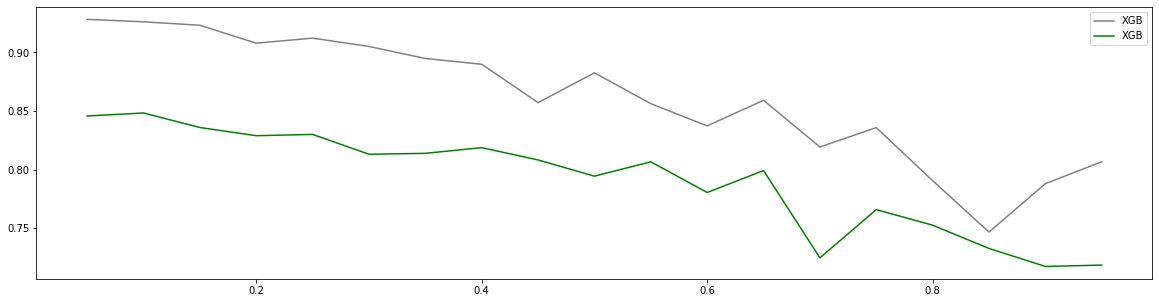

In [62]:
axisx = np.arange(0.05,1,0.05)
rs = []
te = []

for i in axisx:
    reg = XGBR(n_estimators=180,random_state=420,learning_rate=i)
    score = regassess(reg,Xtrain,Ytrain,cv,scoring =["r2","neg_mean_squared_error"],show=False)
    test = reg.fit(Xtrain,Ytrain).score(Xtest,Ytest)
    rs.append(score[0])
    te.append(test)

print(axisx[rs.index(max(rs))],max(rs))
plt.figure(figsize=(20,5))
plt.plot(axisx,te,c="gray",label="XGB")
plt.plot(axisx,rs,c="green",label="XGB")
plt.legend()
plt.show()


通常不调整eta，即便调整，一般它也会在[0.01,0.2]之间变动。如果我们希望模型的效果更好，更多的可能是从树本身的角度来说，**对树进行剪枝**，而不会寄希望于调整eta。

四个参数：`n_estimators`，`learning_rate` ，`silent`，`subsample`
- 不常用于提升模型的表现

梯度提升树可是说是由三个重要的部分组成：
1. 一个能够衡量集成算法效果的，能够被最优化的损失函数$Obj$
2. 一个能够实现预测的弱评估器$f_k(x)$
3. 一种能够让弱评估器集成的手段，包括我们讲解的迭代方法，抽样手段，样本加权等等过程

## 3 XGBoost

class xgboost.XGBRegressor (kwargs，max_depth=3, learning_rate=0.1, n_estimators=100, silent=True,**objective='reg:linear'**, **booster='gbtree'**, n_jobs=1, nthread=None, **gamma=0**, min_child_weight=1,max_delta_step=0, subsample=1, colsample_bytree=1, colsample_bylevel=1, reg_alpha=0, reg_lambda=1,scale_pos_weight=1, base_score=0.5, random_state=0, seed=None, missing=None, importance_type='gain')

### 3.1 选择弱评估器：重要参数booster

xgb.train() & params |xgb.XGBRegressor()
|---|---|
xgb_model | booster
使用哪种弱评估器。可以输入gbtree，gblinear或dart。输入的评估器不同，使用的params参数也不同，每种评估器都有自己的params列表。评估器必须于param参数相匹配，否则报错。|使用哪种弱评估器。可以输入gbtree，gblinear或dart。gbtree代表梯度提升树，dart是Dropouts meet Multiple.Additive Regression Trees，译为抛弃提升树，在建树的过程中会抛弃一部分树，比梯度提升树有更好的防过拟合功能。输入gblinear使用线性模型。


In [63]:
for booster in ["gbtree","gblinear","dart"]:
    reg = XGBR(n_estimators=180
    ,learning_rate=0.1
    ,random_state=420
    ,booster=booster).fit(Xtrain,Ytrain)
    
    print(booster)
    print(reg.score(Xtest,Ytest)) #自己找线性数据试试看"gblinear"的效果吧~

gbtree
0.9260984369386971
gblinear
0.6488041038649521
dart
0.9260984459922119


### 3.2 XGB的目标函数：重要参数objective

集成算法中的损失函数是可选的。回归预测，那我们可以选择调节后的均方误差RMSE作为我们的损失函数。如果我们是进行分类预测，那我们可以选择错误率error或者对数损失log_loss。

XGB的目标函数被写作：传统损失函数 + 模型复杂度 
$$Obj=\sum_{i=1}^{m}{l(y_i,\hat{y_i})}+\sum_{k=1}^K{\Omega{(f_k)}}$$ 

- 第一项是衡量我们的偏差，模型越不准确，第一项就会越大。
- 第二项是衡量我们的方差，模型越复杂，模型的学习就会越具体，到不同数据集上的表现就会差异巨大，方差就会越大。
- 所以我们求解 的最小值，其实是在求解方差与偏差的平衡点，以求模型的泛化误差最小，运行速度最快。

参数“objective"来确定我们目标函数的第一部分中的$l(y_i,\hat{y_i})$,也就是衡量损失的部分

xgb.train() | xgb.XGBRegressor() | xgb.XGBClassifier()
|---|---|---|
obj：默认binary:logistic | objective：默认reg:linear| objective：默认binary:logistic

常用选择有：
输入 | 选用的损失函数
|---|---|
reg:linear| 使用线性回归的损失函数，均方误差，回归时使用
binary:logistic | 使用逻辑回归的损失函数，对数损失log_loss，二分类时使用
binary:hinge | 使用支持向量机的损失函数，Hinge Loss，二分类时使用
multi:softmax  |使用softmax损失函数，多分类时使用



**xbgoost库的调用方式**

1. 读取数据 xgb.DMatrix()
2. 设置参数 param={}
3. 训练模型 bst = xgb.train(param)
   -  xgb.train(param,dtrain,num_round)
4. 预测结果bst.predict()

In [64]:
#————————————————————————————sklearn中XGboost调用方法————————————————————————————
reg = XGBR(n_estimators=180,random_state=420).fit(Xtrain,Ytrain)
reg.score(Xtest,Ytest)


0.9050526026617368

In [65]:
MSE(Ytest,reg.predict(Xtest))

8.835224196909236

In [66]:
#————————————————————————————利用xgboost库————————————————————————————
import xgboost as xgb

dtrain = xgb.DMatrix(Xtrain,Ytrain)  # 对特征矩阵和标签都要传入
dtest = xgb.DMatrix(Xtest,Ytest) 

In [67]:
import pandas as pd
pd.DataFrame(Xtrain)

# 无法将dtrain用表格的形式打开，都在dtrain之前打开

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.03041,0.0,5.19,0.0,0.515,5.895,59.6,5.6150,5.0,224.0,20.2,394.81,10.56
1,0.04113,25.0,4.86,0.0,0.426,6.727,33.5,5.4007,4.0,281.0,19.0,396.90,5.29
2,10.23300,0.0,18.10,0.0,0.614,6.185,96.7,2.1705,24.0,666.0,20.2,379.70,18.03
3,0.17142,0.0,6.91,0.0,0.448,5.682,33.8,5.1004,3.0,233.0,17.9,396.90,10.21
4,0.05059,0.0,4.49,0.0,0.449,6.389,48.0,4.7794,3.0,247.0,18.5,396.90,9.62
...,...,...,...,...,...,...,...,...,...,...,...,...,...
349,0.03871,52.5,5.32,0.0,0.405,6.209,31.3,7.3172,6.0,293.0,16.6,396.90,7.14
350,0.12650,25.0,5.13,0.0,0.453,6.762,43.4,7.9809,8.0,284.0,19.7,395.58,9.50
351,6.96215,0.0,18.10,0.0,0.700,5.713,97.0,1.9265,24.0,666.0,20.2,394.43,17.11
352,0.09164,0.0,10.81,0.0,0.413,6.065,7.8,5.2873,4.0,305.0,19.2,390.91,5.52


In [68]:
#写明参数，silent默认为False，通常需要手动将它关闭
param = {'silent':False,'objective':'reg:linear',"eta":0.1}
num_round=180

In [69]:
# 类train，可以直接导入的参数是训练数据，树的数量，其他参数都需要通过params来导入
bst = xgb.train(param,dtrain,num_round)

[10:35:05] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[10:35:05] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




In [70]:
preds = bst.predict(dtest)
preds

array([ 6.4613175, 22.123888 , 30.755163 , 13.424353 ,  8.378563 ,
       23.608473 , 14.2151165, 16.0265   , 15.498961 , 14.106488 ,
       24.030863 , 34.36362  , 21.461111 , 28.839497 , 19.568035 ,
       10.18866  , 19.42369  , 23.539951 , 22.850523 , 23.19871  ,
       17.82486  , 16.072205 , 27.602034 , 20.773046 , 20.868807 ,
       15.865789 , 22.076588 , 29.292158 , 22.841051 , 15.770392 ,
       36.680496 , 21.057947 , 20.137005 , 23.777853 , 22.70615  ,
       23.863268 , 15.595315 , 24.565872 , 17.720552 , 33.951115 ,
       18.784288 , 20.483376 , 37.106678 , 18.068266 , 12.73839  ,
       31.186407 , 45.895035 , 12.696718 , 10.773068 , 36.064293 ,
       26.262571 , 19.908836 , 20.715096 , 48.814903 , 27.550056 ,
       25.225826 , 17.15366  , 21.215551 , 17.426773 , 18.478971 ,
       14.6453705, 22.841473 , 18.869593 , 29.990978 , 29.933191 ,
       18.756855 , 18.784918 , 16.33362  , 23.15597  , 19.144344 ,
       29.724382 , 42.121906 , 31.544363 , 23.017508 , 19.5360

In [71]:
#接口predict
from sklearn.metrics import r2_score
r2_score(Ytest,bst.predict(dtest))


0.9260984369386971

In [72]:
MSE(Ytest,bst.predict(dtest))

6.876827553497432

- 从R2和MSE的两个角度，都是xgb库本身表现更优秀
- xgb库运算也较快

### 3.3 求解XGB的目标函数

### 3.4 参数化决策树$f_k(x)$：参数alpha，lambda

- 利用L1正则化参数$\alpha$，L2参数$\lambda$ 进行惩罚
- 很少使用这两个参数，一般利用网格搜索
- 要用的话，优先使用L2正则化

**XGB vs GBDT 核心区别2：正则项的存在**

在普通的梯度提升树GBDT中，我们是不在目标函数中使用正则项的。但XGB借用正则项来修正树模型天生容易过拟合这个缺陷，在剪枝之前让模型能够尽量不过拟合。

参数含义 | xgb.train()| xgb.XGBRegressor()
|---|---|---
L1正则项的参数 | alpha，默认0，取值范围[0, +∞] | reg_alpha，默认0，取值范围[0, +∞]
L2正则项的参数  |lambda，默认1，取值范围[0, +∞] | reg_lambda，默认1，取值范围[0, +∞]


$\alpha$和$\lambda$越大，惩罚越重，正则项所占的比例就越大，在尽全力最小化目标函数的最优化方向下，叶子节点数量就会被压制，模型的复杂度就越来越低，所以对于天生过拟合的XGB来说，正则化可以一定程度上提升模型效果。




### 3.5 让树停止生长：重要参数gamma

$\gamma$是“复杂性控制”（complexity control），所以$\gamma$是防止过拟合的重要参数。实践证明$\gamma$是对梯度提升树影响最大的参数之一，其效果丝毫不逊色于n_estimators和防止过拟合的神器max_depth。

在树的叶节点上进行进一步分枝所需的最小目标函数减少量

参数含义 | xgb.train() | xgb.XGBRegressor()
|---|---|---|
复杂度的惩罚项 | gamma，默认0，取值范围[0, +∞] | gamma，默认0，取值范围[0, +∞]

4.3 0.8344129938755398 0.0038064127927813565
4.3500000000000005 0.8298701484629785 0.0036576618667615397
4.3 0.8344129938755398 0.0038064127927813565 0.03122546939004338


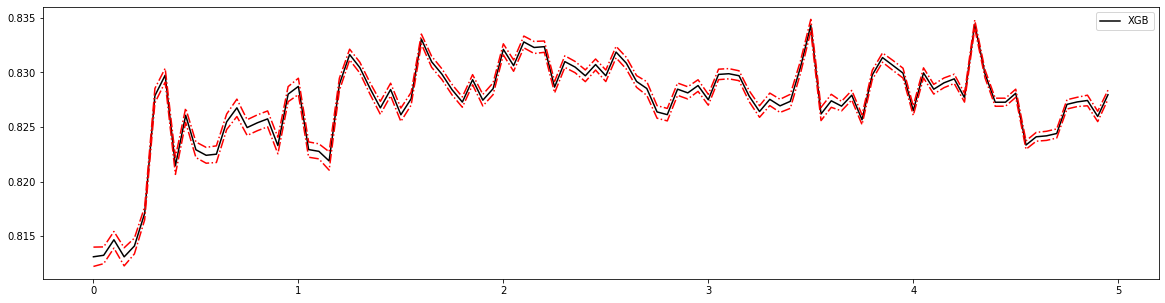

In [73]:
axisx = np.arange(0,5,0.05)
rs = []
var = []
ge = []

for i in axisx:
    reg = XGBR(n_estimators=180,random_state=420,gamma=i)
    result = CVS(reg,Xtrain,Ytrain,cv=cv)
    rs.append(result.mean())
    var.append(result.var())
    ge.append((1 - result.mean())**2+result.var())

# 画图   
print(axisx[rs.index(max(rs))],max(rs),var[rs.index(max(rs))])
print(axisx[var.index(min(var))],rs[var.index(min(var))],min(var))
print(axisx[ge.index(min(ge))],rs[ge.index(min(ge))],var[ge.index(min(ge))],min(ge))
rs = np.array(rs)
var = np.array(var)*0.1
plt.figure(figsize=(20,5))
plt.plot(axisx,rs,c="black",label="XGB")
plt.plot(axisx,rs+var,c="red",linestyle='-.')
plt.plot(axisx,rs-var,c="red",linestyle='-.')
plt.legend()
plt.show()


在sklearn下XGBoost太不稳定，如果这样来调整参数的话，效果就很难保证。因此，为了调整$\gamma$，我们需要来引入新的工具，xgboost库中的类xgboost.cv

xgboost.cv (params, dtrain, num_boost_round=10, nfold=3, stratified=False, folds=None, metrics=(), obj=None,feval=None, maximize=False, early_stopping_rounds=None, fpreproc=None, as_pandas=True, verbose_eval=None,show_stdv=True, seed=0, callbacks=None, shuffle=True)

- xgboost.cv 可以同时返回训练集合测试集中的打分

In [74]:
import xgboost as xgb

dfull = xgb.DMatrix(X,y)

# 设定参数param
param1 = {'silent':False,'obj':'reg:linear','gamma':0}
num_round = 180
n_fold=5



In [75]:
# 使用类xgb.cv
time0 = time()
cvresult1 = xgb.cv(param1, dfull, num_round,n_fold)
print(datetime.datetime.fromtimestamp(time()-time0).strftime("%M:%S:%f"))


[10:35:53] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "obj", "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[10:35:53] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "obj", "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[10:35:53] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "obj", "silent" } might not be used.

  

In [76]:
cvresult1

# 随着树的不断增加 模型的效果逐渐提高

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,17.105578,0.129116,17.163215,0.584297
1,12.337973,0.097557,12.519736,0.473458
2,8.994071,0.065756,9.404534,0.472310
3,6.629481,0.050323,7.250335,0.500342
4,4.954406,0.033209,5.920812,0.591874
...,...,...,...,...
175,0.001299,0.000288,3.669898,0.857676
176,0.001285,0.000260,3.669897,0.857677
177,0.001275,0.000239,3.669903,0.857669
178,0.001263,0.000217,3.669901,0.857672


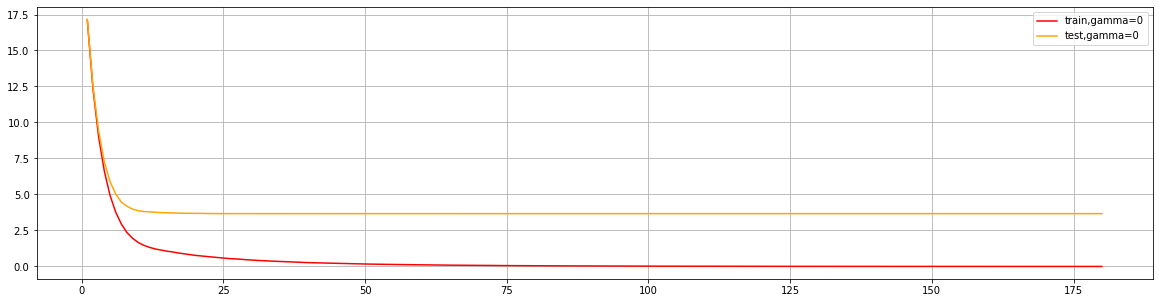

In [77]:
plt.figure(figsize=(20,5))
plt.grid()
plt.plot(range(1,181),cvresult1.iloc[:,0],c="red",label="train,gamma=0")
plt.plot(range(1,181),cvresult1.iloc[:,2],c="orange",label="test,gamma=0")
plt.legend()
plt.show()

**用于回归和分类的评估指标**

- rmse 回归用，调整后的均方误差
- mae 回归用，绝对平均误差
- logloss 二分类用，对数损失
- mlogloss 多分类用，对数损失
- error 分类用，分类误差，等于1-准确率
- auc 分类用，AUC面积

[10:35:54] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "obj", "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[10:35:54] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "obj", "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[10:35:54] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "obj", "silent" } might not be used.

  

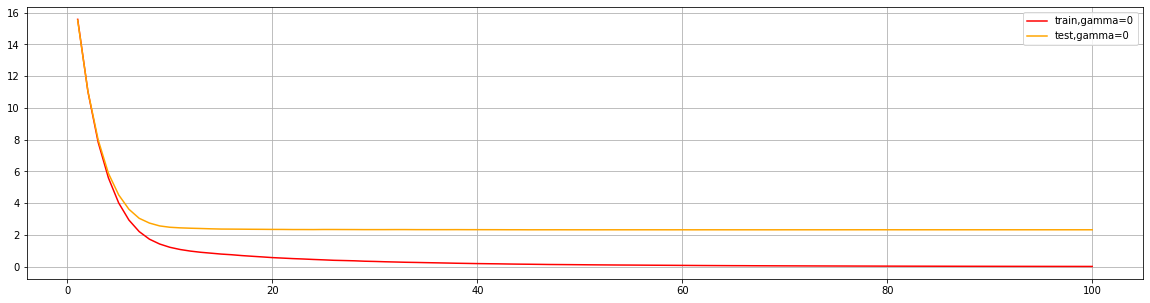

In [78]:
param1 = {'silent':True,'obj':'reg:linear','gamma':0,'eval_metric':'mae'}  
# 使用绝对平方误差以后 数值变小 但是整体的趋势一直
num_round=100  # 之前设定为180 后续的坐标轴也发生了变化

cvresult1 = xgb.cv(param1,dfull,num_round,n_fold)

plt.figure(figsize=(20,5))
plt.grid()
plt.plot(range(1,101),cvresult1.iloc[:,0],c="red",label="train,gamma=0")
plt.plot(range(1,101),cvresult1.iloc[:,2],c="orange",label="test,gamma=0")
plt.legend()
plt.show()

#从这个图中，我们可以看出什么？
## 从75棵树开始 模型趋于平稳，不需要这么多数
#怎样从图中观察模型的泛化能力？
#从这个图的角度来说，模型的调参目标是什么？


In [79]:
#————————————————————————————调整gamma————————————————————————————
param1 = {'silent':True,'obj':'reg:linear',"gamma":0}
param2 = {'silent':True,'obj':'reg:linear',"gamma":20}
num_round = 180
n_fold=5


In [80]:
time0 = time()
cvresult1 = xgb.cv(param1, dfull, num_round,n_fold)
print(datetime.datetime.fromtimestamp(time()-time0).strftime("%M:%S:%f"))


[10:35:55] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "obj", "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[10:35:55] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "obj", "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[10:35:55] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "obj", "silent" } might not be used.

  

In [81]:
# gamma=20 所需的运行时间增加
time0 = time()
cvresult2 = xgb.cv(param2, dfull, num_round,n_fold)
print(datetime.datetime.fromtimestamp(time()-time0).strftime("%M:%S:%f"))


[10:35:56] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "obj", "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[10:35:56] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "obj", "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[10:35:56] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "obj", "silent" } might not be used.

  

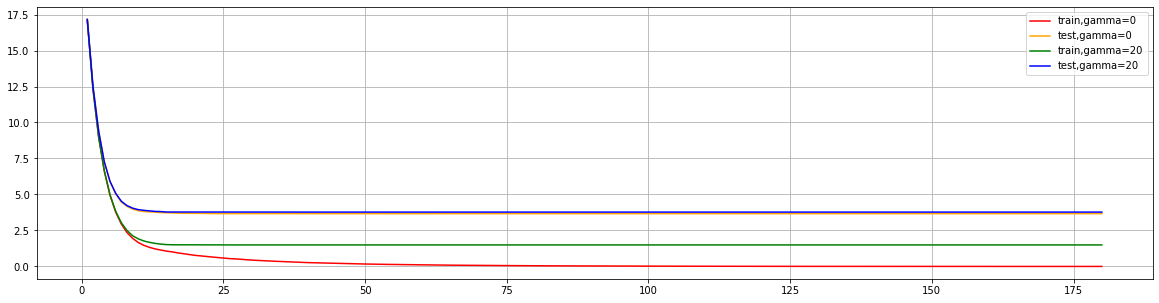

In [82]:
plt.figure(figsize=(20,5))
plt.grid()
plt.plot(range(1,181),cvresult1.iloc[:,0],c="red",label="train,gamma=0")
plt.plot(range(1,181),cvresult1.iloc[:,2],c="orange",label="test,gamma=0")
plt.plot(range(1,181),cvresult2.iloc[:,0],c="green",label="train,gamma=20")
plt.plot(range(1,181),cvresult2.iloc[:,2],c="blue",label="test,gamma=20")
plt.legend()
plt.show()

#从这里，你看出gamma是如何控制过拟合了吗？
# 控制训练集上的训练，降低训练集上的表现

**gamma如何控制过拟合**
- 控制训练集上的训练，降低训练集上的表现
- gamma不一定能够增加训练集上的表现（不学习的那么具体），但是能够增加模型的泛化能力

- 利用乳腺癌数据进行分类
---

In [83]:
from sklearn.datasets import load_breast_cancer
data2 = load_breast_cancer()
x2 = data2.data
y2 = data2.target

In [84]:
import xgboost as xgb
dfull2 = xgb.DMatrix(x2,y2)


In [85]:
param1 = {'silent':True,'obj':'binary:logistic',"gamma":0,"nfold":5}
param2 = {'silent':True,'obj':'binary:logistic',"gamma":2,"nfold":5}
num_round = 100

In [86]:
time0 = time()
cvresult1 = xgb.cv(param1, dfull2, num_round,metrics=("error"))
print(datetime.datetime.fromtimestamp(time()-time0).strftime("%M:%S:%f"))

[10:35:57] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "nfold", "obj", "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[10:35:57] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "nfold", "obj", "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[10:35:57] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "nfold", "obj", "silen

In [87]:
time0 = time()
cvresult2 = xgb.cv(param2, dfull2, num_round,metrics=("error"))
print(datetime.datetime.fromtimestamp(time()-time0).strftime("%M:%S:%f"))

[10:35:58] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "nfold", "obj", "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[10:35:58] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "nfold", "obj", "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[10:35:58] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "nfold", "obj", "silen

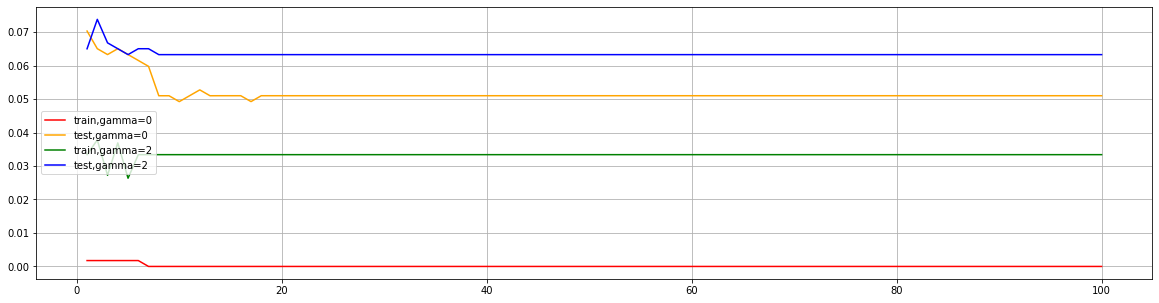

In [88]:
plt.figure(figsize=(20,5))
plt.grid()
plt.plot(range(1,101),cvresult1.iloc[:,0],c="red",label="train,gamma=0")
plt.plot(range(1,101),cvresult1.iloc[:,2],c="orange",label="test,gamma=0")
plt.plot(range(1,101),cvresult2.iloc[:,0],c="green",label="train,gamma=2")
plt.plot(range(1,101),cvresult2.iloc[:,2],c="blue",label="test,gamma=2")
plt.legend()
plt.show()


# gamma过大 模型可能过于保守

有了xgboost.cv这个工具，我们的参数调整就容易多了。这个工具可以让我们直接看到参数如何影响了模型的泛化能力。接下来，我们将重点讲解如何使用xgboost.cv这个类进行参数调整。

## 4 XGBoost应用中的其他问题
---
### 4.1 过拟合：剪枝参数与回归模型调参


class xgboost.XGBRegressor (**max_depth=3**, learning_rate=0.1, n_estimators=100, silent=True,
objective='reg:linear', booster='gbtree', n_jobs=1, nthread=None, gamma=0, **min_child_weight=1**,
**max_delta_step=0**, subsample=1, **colsample_bytree=1**, **colsample_bylevel=1**, reg_alpha=0, reg_lambda=1,scale_pos_weight=1, base_score=0.5, random_state=0, seed=None, missing=None, importance_type='gain', kwargs)

作为树模型，减轻过拟合的方式主要是靠对决策树剪枝来降低模型的复杂度，以求降低方差

参数含义| xgb.train() | xgb.XGBRegressor()
|---|---|---|
树的最大深度 |max_depth，默认6  |max_depth，默认6
每次生成树时随机抽样特征的比例 |colsample_bytree，默认1 | colsample_bytree，默认1
每次生成树的一层时随机抽样特征的比例 | colsample_bylevel，默认1 | colsample_bylevel，默认1
每次生成一个叶子节点时随机抽样特征的比例 | colsample_bynode，默认1| N.A.
一个叶子节点上所需要的最小即叶子节点上的二阶导数之和类似于样本权重 |min_child_weight，默认1 |min_child_weight，默认1

- 最大深度是决策树中的剪枝法宝，最常用
- 三个随机抽样特征的参数中，前两个比较常用
- 参数min_child_weight不太常用

[10:38:26] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "nfold", "obj", "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[10:38:26] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "nfold", "obj", "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[10:38:26] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "nfold", "obj", "silen

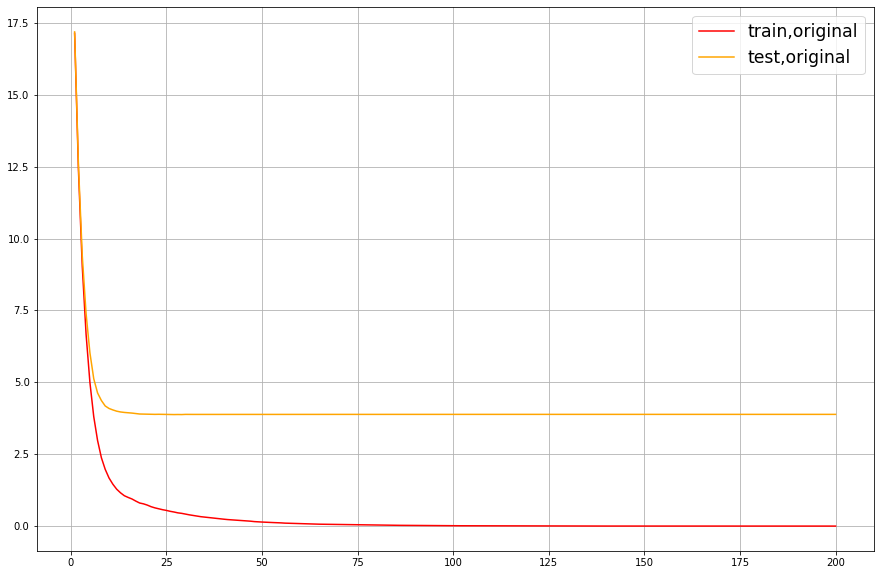

In [91]:
dfull = xgb.DMatrix(X,y)
param1 = {'silent':True #并非默认
            ,'obj':'reg:linear' #并非默认
            ,"subsample":1
            ,"max_depth":6
            ,"eta":0.3
            ,"gamma":0
            ,"lambda":1
            ,"alpha":0
            ,"colsample_bytree":1
            ,"colsample_bylevel":1
            ,"colsample_bynode":1
            ,"nfold":5}
num_round = 200

num_round = 200
time0 = time()
cvresult1 = xgb.cv(param1, dfull, num_round)
print(datetime.datetime.fromtimestamp(time()-time0).strftime("%M:%S:%f"))
fig,ax = plt.subplots(1,figsize=(15,10))

#ax.set_ylim(top=5)
ax.grid()
ax.plot(range(1,201),cvresult1.iloc[:,0],c="red",label="train,original")
ax.plot(range(1,201),cvresult1.iloc[:,2],c="orange",label="test,original")
ax.legend(fontsize="xx-large")
plt.show()

[10:39:31] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "nfold", "obj", "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[10:39:31] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "nfold", "obj", "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[10:39:31] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "nfold", "obj", "silen

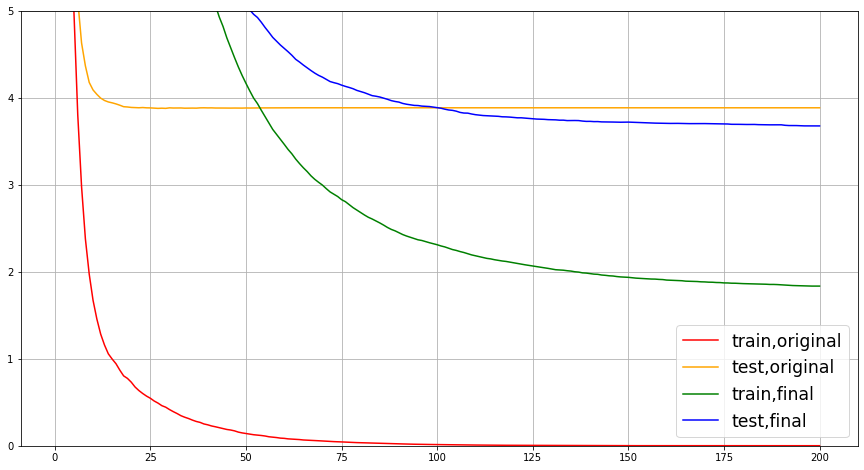

In [93]:
#默认设置
param1 = {'silent':True
            ,'obj':'reg:linear'
            ,"subsample":1
            ,"max_depth":6
            ,"eta":0.3
            ,"gamma":0
            ,"lambda":1
            ,"alpha":0
            ,"colsample_bytree":1
            ,"colsample_bylevel":1
            ,"colsample_bynode":1
            ,"nfold":5}
num_round = 200
time0 = time()
cvresult1 = xgb.cv(param1, dfull, num_round)
print(datetime.datetime.fromtimestamp(time()-time0).strftime("%M:%S:%f"))
fig,ax = plt.subplots(1,figsize=(15,8))
ax.set_ylim(top=5)
ax.grid()

ax.plot(range(1,201),cvresult1.iloc[:,0],c="red",label="train,original")
ax.plot(range(1,201),cvresult1.iloc[:,2],c="orange",label="test,original")
#调参结果1
param2 = {'silent':True
            ,'obj':'reg:linear'
            ,"subsample":1
            ,"eta":0.05
            ,"gamma":20
            ,"lambda":3.5
            ,"alpha":0.2
            ,"max_depth":4
            ,"colsample_bytree":0.4
            ,"colsample_bylevel":0.6
            ,"colsample_bynode":1
            ,"nfold":5}
#调参结果2
param3 = {'silent':True
            ,'obj':'reg:linear'
            ,"max_depth":2
            ,"eta":0.05
            ,"gamma":0
            ,"lambda":1
            ,"alpha":0
            ,"colsample_bytree":1
            ,"colsample_bylevel":0.4
            ,"colsample_bynode":1
            ,"nfold":5}
            
time0 = time()
cvresult2 = xgb.cv(param2, dfull, num_round)
print(datetime.datetime.fromtimestamp(time()-time0).strftime("%M:%S:%f"))
ax.plot(range(1,201),cvresult2.iloc[:,0],c="green",label="train,final")
ax.plot(range(1,201),cvresult2.iloc[:,2],c="blue",label="test,final")
ax.legend(fontsize="xx-large")
plt.show()


1. 一个个参数调整太麻烦，可不可以使用网格搜索呢
   最好不要一次性将所有的参数都放入进行搜索，最多一次两三个。有一些互相影响的参数需要放在一起使用，比如学习率eta和树的数量n_estimators
2. 调参的时候参数的顺序会影响调参结果吗？
    会影响，因此在现实中，我们会优先调整那些对模型影响巨大的参数。在这里，我建议的剪枝上的调参顺序是：n_estimators与eta共同调节，gamma或者max_depth，采样和抽样参数（纵向抽样影响更大），最后才是正则化的两个参数。
3. 调参之后测试集上的效果还没有原始设定上的效果好怎么办？
    如果调参之后，交叉验证曲线确实显示测试集和训练集上的模型评估效果是更加接近的，推荐使用调参之后的效果。
我们希望增强模型的泛化能力，然而泛化能力的增强并不代表着在新数据集上模型的结果一定优秀，因为未知数据集
并非一定符合全数据的分布


### 4.2 XGBoost模型的保存和调用

以XGBoost为例，来讲解两种主要的模型保存和调用方法

#### 4.2.1 使用Pickle保存和调用模型

pickle和open函数的连用，来将我们的模型保存到本地
- pickle.dump(bst, open("xgboostonboston.dat","wb"))
  - 第一个参数就是模型
  - 第二个参数是打开的方式 和名字
- 导入模型pickle.load(open("xgboostonboston.dat", "rb"))
  - open 以二进制的形式读入


In [94]:
import pickle
dtrain = xgb.DMatrix(Xtrain,Ytrain)
#设定参数，对模型进行训练
param = {'silent':True
        ,'obj':'reg:linear'
        ,"subsample":1
        ,"eta":0.05
        ,"gamma":20
        ,"lambda":3.5
        ,"alpha":0.2
        ,"max_depth":4
        ,"colsample_bytree":0.4
        ,"colsample_bylevel":0.6
        ,"colsample_bynode":1}
num_round = 180
bst = xgb.train(param, dtrain, num_round)

[10:51:23] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "obj", "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




In [95]:
#保存模型
pickle.dump(bst, open("xgboostonboston.dat","wb"))
#注意，open中我们往往使用w或者r作为读取的模式，但其实w与r只能用于文本文件，当我们希望导入的不是文本文件，而
# 是模型本身的时候，我们使用"wb"和"rb"作为读取的模式。其中wb表示以二进制写入，rb表示以二进制读入

In [96]:
#看看模型被保存到了哪里？
import sys
sys.path  # python的运行目录

['g:\\Python学习资料2022年\\codetest\\sklearn课堂\\Note_sklearn',
 'c:\\Users\\HP\\Python\\Python310\\python310.zip',
 'c:\\Users\\HP\\Python\\Python310\\DLLs',
 'c:\\Users\\HP\\Python\\Python310\\lib',
 'c:\\Users\\HP\\Python\\Python310',
 '',
 'C:\\Users\\HP\\AppData\\Roaming\\Python\\Python310\\site-packages',
 'C:\\Users\\HP\\AppData\\Roaming\\Python\\Python310\\site-packages\\win32',
 'C:\\Users\\HP\\AppData\\Roaming\\Python\\Python310\\site-packages\\win32\\lib',
 'C:\\Users\\HP\\AppData\\Roaming\\Python\\Python310\\site-packages\\Pythonwin',
 'c:\\Users\\HP\\Python\\Python310\\lib\\site-packages',
 'c:\\Users\\HP\\Python\\Python310\\lib\\site-packages\\IPython\\extensions',
 'C:\\Users\\HP\\.ipython']

In [97]:
#重新打开jupyter lab
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split as TTS
from sklearn.metrics import mean_squared_error as MSE
import pickle
import xgboost as xgb
data = load_boston()
X = data.data
y = data.target
Xtrain,Xtest,Ytrain,Ytest = TTS(X,y,test_size=0.3,random_state=420)

c:\Users\HP\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing datase

In [98]:
#注意，如果我们保存的模型是xgboost库中建立的模型，则导入的数据类型也必须是xgboost库中的数据类型
dtest = xgb.DMatrix(Xtest,Ytest)

In [99]:
#导入模型
loaded_model = pickle.load(open("xgboostonboston.dat", "rb"))
print("Loaded model from: xgboostonboston.dat")

Loaded model from: xgboostonboston.dat


In [101]:
#做预测
ypreds = loaded_model.predict(dtest)
from sklearn.metrics import mean_squared_error as MSE, r2_score
MSE(Ytest,ypreds)


9.178375452806907

In [102]:
r2_score(Ytest,ypreds)

0.9013649408758324

#### 4.2.2 使用Joblib保存和调用模型

- joblib.dump(bst,"xgboost-boston.dat") 保存
- joblib.load("xgboost-boston.dat") 导入



In [103]:
bst = xgb.train(param, dtrain, num_round)
import joblib

[10:59:45] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "obj", "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




In [104]:
#同样可以看看模型被保存到了哪里
joblib.dump(bst,"xgboost-boston.dat")


['xgboost-boston.dat']

In [105]:
loaded_model = joblib.load("xgboost-boston.dat")


In [106]:
ypreds = loaded_model.predict(dtest)


In [107]:
MSE(Ytest, ypreds)


9.178375452806907

In [108]:
r2_score(Ytest,ypreds)


0.9013649408758324

In [109]:
#————————————————————————————使用sklearn中的模型————————————————————————————

from xgboost import XGBRegressor as XGBR
bst = XGBR(n_estimators=200
            ,eta=0.05,gamma=20
            ,reg_lambda=3.5
            ,reg_alpha=0.2
            ,max_depth=4
            ,colsample_bytree=0.4
            ,colsample_bylevel=0.6).fit(Xtrain,Ytrain)


In [110]:

joblib.dump(bst,"xgboost-boston.dat")
loaded_model = joblib.load("xgboost-boston.dat")


In [111]:

#则这里可以直接导入Xtest
ypreds = loaded_model.predict(Xtest)
MSE(Ytest, ypreds)

9.18818551539731

### 4.3 分类案例：XGB中的样本不均衡问题

XGB中存在着调节样本不平衡的参数scale_pos_weight，这个参数非常类似于之前随机森林和支持向量机中我们都使用到过的class_weight参数，通常我们在参数中输入的是**负样本量与正样本量之比**

参数含义 | xgb.train() | xgb.XGBClassifier()
|---|---|---|
控制正负样本比例，表示为负/正样本比例，在样本不平衡问题中使用 |scale_pos_weight ，默认1  |scale_pos_weight，默认1

**1. 导库，创建样本不均衡的数据集**

In [113]:
import numpy as np
import xgboost as xgb
import matplotlib.pyplot as plt
from xgboost import XGBClassifier as XGBC
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split as TTS
from sklearn.metrics import confusion_matrix as cm, recall_score as recall, roc_auc_score as auc

class_1 = 500 #类别1有500个样本
class_2 = 50 #类别2只有50个
centers = [[0.0, 0.0], [2.0, 2.0]] #设定两个类别的中心
clusters_std = [1.5, 0.5] #设定两个类别的方差，通常来说，样本量比较大的类别会更加松散
X, y = make_blobs(n_samples=[class_1, class_2],
                    centers=centers,
                    cluster_std=clusters_std,
                    random_state=0, shuffle=False)
                    
Xtrain, Xtest, Ytrain, Ytest = TTS(X,y,test_size=0.3,random_state=420)


In [114]:
(y == 1).sum() / y.shape[0]   

0.09090909090909091

**2. 在数据集上建模：sklearn模式**

In [115]:
#在sklearn下建模#
clf = XGBC().fit(Xtrain,Ytrain)
ypred = clf.predict(Xtest)


In [116]:
clf.score(Xtest,Ytest)  # 分类模型返回准确率


0.9272727272727272

In [ ]:
cm(Ytest,ypred,labels=[1,0])  # 混淆矩阵 少数类写在前面


In [117]:
recall(Ytest,ypred)


0.6923076923076923

In [118]:
auc(Ytest,clf.predict_proba(Xtest)[:,1])
# 输入真实值和预测概率

0.9701417004048585

In [120]:
#负/正样本比例
clf_ = XGBC(scale_pos_weight=10).fit(Xtrain,Ytrain)
ypred_ = clf_.predict(Xtest)


In [121]:
clf_.score(Xtest,Ytest)


0.9333333333333333

In [122]:
cm(Ytest,ypred_,labels=[1,0])


array([[ 10,   3],
       [  8, 144]], dtype=int64)

In [124]:
recall(Ytest,ypred_)


0.7692307692307693

In [125]:
auc(Ytest,clf_.predict_proba(Xtest)[:,1])


0.9696356275303644

In [127]:
#随着样本权重逐渐增加，模型的recall,auc和准确率如何变化？
for i in [1,5,10,20,30]:
    clf_ = XGBC(scale_pos_weight=i).fit(Xtrain,Ytrain)
    ypred_ = clf_.predict(Xtest)
    print(i)
    print("\tAccuracy:{}".format(clf_.score(Xtest,Ytest)))
    print("\tRecall:{}".format(recall(Ytest,ypred_)))
    print("\tAUC:{}".format(auc(Ytest,clf_.predict_proba(Xtest)[:,1])))

1
	Accuracy:0.9272727272727272
	Recall:0.6923076923076923
	AUC:0.9701417004048585
5
	Accuracy:0.9393939393939394
	Recall:0.8461538461538461
	AUC:0.9660931174089069
10
	Accuracy:0.9333333333333333
	Recall:0.7692307692307693
	AUC:0.9696356275303644
20
	Accuracy:0.9333333333333333
	Recall:0.7692307692307693
	AUC:0.9686234817813765
30
	Accuracy:0.9393939393939394
	Recall:0.8461538461538461
	AUC:0.9701417004048583


**3. 在数据集上建模：xgboost模式**

In [128]:
dtrain = xgb.DMatrix(Xtrain,Ytrain)
dtest = xgb.DMatrix(Xtest,Ytest)

#看看xgboost库自带的predict接口
param= {'silent':True,'objective':'binary:logistic',"eta":0.1,"scale_pos_weight":1}
num_round = 100


In [129]:
bst = xgb.train(param, dtrain, num_round)


[11:17:07] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




In [130]:
preds = bst.predict(dtest)
#看看preds返回了什么？
preds  # 返回的是概率

array([0.00110357, 0.00761518, 0.00110357, 0.00110357, 0.93531454,
       0.00466839, 0.00110357, 0.00110357, 0.00110357, 0.00110357,
       0.00110357, 0.00410493, 0.00454478, 0.00571528, 0.00751026,
       0.00110357, 0.00110357, 0.00110357, 0.00110357, 0.00110357,
       0.00110357, 0.00110357, 0.00110357, 0.00110357, 0.00110357,
       0.00712637, 0.00110357, 0.00110357, 0.00110357, 0.00110357,
       0.00110357, 0.00110357, 0.00110357, 0.00793251, 0.00466839,
       0.00110357, 0.00339395, 0.00657186, 0.00110357, 0.00457053,
       0.00571528, 0.0026763 , 0.00110357, 0.00110357, 0.00110357,
       0.00884932, 0.00712637, 0.00110357, 0.00712637, 0.00466839,
       0.00110357, 0.00110357, 0.00712637, 0.00110357, 0.00110357,
       0.00110357, 0.00110357, 0.63748044, 0.00110357, 0.00793251,
       0.00110357, 0.00451971, 0.00644181, 0.00110357, 0.00110357,
       0.00110357, 0.00110357, 0.00751026, 0.00712637, 0.00110357,
       0.00866458, 0.00110357, 0.00110357, 0.00110357, 0.91610

In [132]:
#自己设定阈值
ypred = preds.copy()
ypred[preds > 0.5] = 1
ypred[ypred != 1] = 0
ypred

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1.], dtype=float32)

In [133]:
#写明参数
scale_pos_weight = [1,5,10]
names = ["negative vs positive: 1"
        ,"negative vs positive: 5"
        ,"negative vs positive: 10"]


In [135]:
#导入模型评估指标
from sklearn.metrics import accuracy_score as accuracy, recall_score as recall,roc_auc_score as auc

In [136]:
for name,i in zip(names,scale_pos_weight):
    param= {'silent':True,'objective':'binary:logistic',"eta":0.1,"scale_pos_weight":i}
    clf = xgb.train(param, dtrain, num_round)
    preds = clf.predict(dtest)
    ypred = preds.copy()
    ypred[preds > 0.5] = 1
    ypred[ypred != 1] = 0
    print(name)
    print("\tAccuracy:{}".format(accuracy(Ytest,ypred)))
    print("\tRecall:{}".format(recall(Ytest,ypred)))
    print("\tAUC:{}".format(auc(Ytest,preds)))


[11:20:15] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


negative vs positive: 1
	Accuracy:0.9272727272727272
	Recall:0.6923076923076923
	AUC:0.9741902834008097
[11:20:15] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


negative vs positive: 5
	Accuracy:0.9393939393939394
	Recall:0.846

In [137]:
#当然我们也可以尝试不同的阈值
for name,i in zip(names,scale_pos_weight):
    for thres in [0.3,0.5,0.7,0.9]:
        param= {'silent':True,'objective':'binary:logistic',"eta":0.1,"scale_pos_weight":i}
        clf = xgb.train(param, dtrain, num_round)
        preds = clf.predict(dtest)
        ypred = preds.copy()
        ypred[preds > thres] = 1
        ypred[ypred != 1] = 0
        print("{},thresholds:{}".format(name,thres))
        print("\tAccuracy:{}".format(accuracy(Ytest,ypred)))
        print("\tRecall:{}".format(recall(Ytest,ypred)))
        print("\tAUC:{}".format(auc(Ytest,preds)))


[11:20:42] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


negative vs positive: 1,thresholds:0.3
	Accuracy:0.9393939393939394
	Recall:0.8461538461538461
	AUC:0.9741902834008097
[11:20:42] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


negative vs positive: 1,thresholds:0.5
	Accuracy:0.

### 4.4 XGBoost类中的其他参数和功能

- 更多计算资源：n_jobs
    nthread和n_jobs都是算法运行所使用的线程，与sklearn中规则一样，输入整数表示使用的线程，输入-1表示使用计
算机全部的计算资源
- 降低学习难度：base_score
  
    base_score是一个比较容易被混淆的参数，它被叫做全局偏差，在分类问题中，它是我们希望关注的分类的先验概
率。通常不调整
- 生成树的随机模式：random_state
- 自动处理缺失值：missing
